<a href="https://colab.research.google.com/github/Rubait-islam-jami/Machine-learning/blob/main/AI_ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [44]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR,SVC

plt.rcParams['figure.figsize']=(8,5)
plt.rcParams['axes.grid']=True
RANDOM_STATE=42
np.random.seed(RANDOM_STATE)


# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [5]:
# TODO: Load regression dataset
insurance_df = pd.read_csv('/content/sample_data/insurance.csv')
print(insurance_df.shape)
insurance_df.head()



(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print('shape',insurance_df.shape)

shape (1338, 7)


In [8]:
target ="charges"

## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [9]:
# TODO: Perform EDA
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


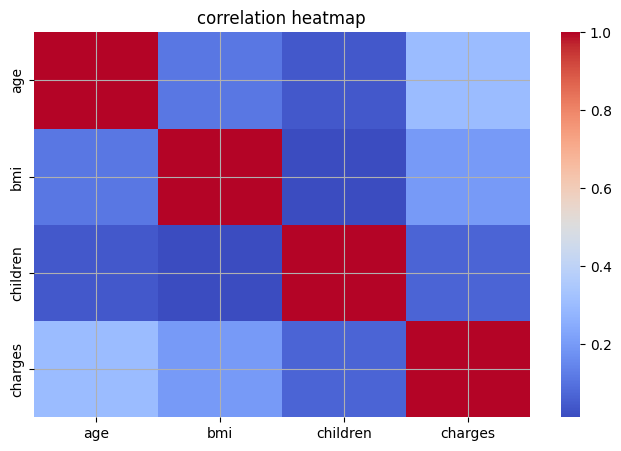

In [10]:
sns.heatmap(insurance_df.corr(numeric_only=True),cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()


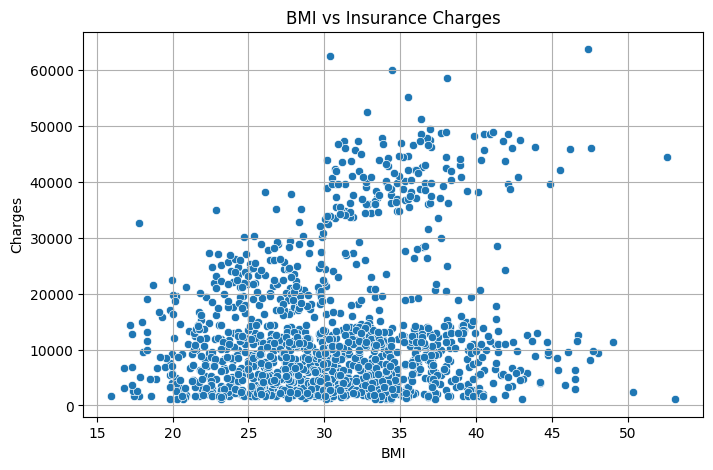

In [11]:
sns.scatterplot(x=insurance_df["bmi"],y=insurance_df["charges"])
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Insurance Charges")
plt.show()

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [12]:
# TODO: Prepare features
insurance_encoded =pd.get_dummies(insurance_df,drop_first=True)

In [13]:
X= insurance_encoded.drop("charges",axis=1)
Y =insurance_encoded["charges"]

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size=0.2,random_state=42
)
print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

explination:

we apply StandardScaler to standrize the features so that they have
mean 0 and sd 1.it ensures that all features contribute equally to
the model and improve performance

## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [16]:
# TODO: Multiple Linear Regression
lin_reg= LinearRegression()
lin_reg.fit(X_train,Y_train)

Y_pred =lin_reg.predict(X_test)

In [17]:
rmse =np.sqrt(mean_squared_error(Y_test,Y_pred))
mae= mean_absolute_error(Y_test,Y_pred)
r2= r2_score(Y_test,Y_pred)

print("rmse",rmse)
print("mae",mae)
print("r2",r2)

rmse 5796.284659276274
mae 4181.194473753651
r2 0.7835929767120722


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [18]:
# TODO: Polynomial Regression
poly = PolynomialFeatures(degree=2)

X_train_poly =poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly,Y_train)

Y_pred_poly = poly_model.predict(X_test_poly)

In [19]:
rmse_poly =np.sqrt(mean_squared_error(Y_test,Y_pred_poly))
mae_poly= mean_absolute_error(Y_test,Y_pred_poly)
r2_poly= r2_score(Y_test,Y_pred_poly)

print("rmse",rmse_poly)
print("mae",mae_poly)
print("r2",r2_poly)

rmse 4551.132385233193
mae 2729.500133639457
r2 0.866583090316484


after applying both i can say that polynomial regression is better than multiple linear regression.because the rmse and mae values are lower so it explians more variation in insurance charges.also polynomial can capture non linear regression

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [20]:
# TODO: Support Vector Regression
svr_model = SVR(kernel='rbf')

svr_model.fit(X_train,Y_train)

Y_pred_svr = svr_model.predict(X_test)

In [21]:
rmse_svr =np.sqrt(mean_squared_error(Y_test,Y_pred_svr))
mae_svr= mean_absolute_error(Y_test,Y_pred_svr)
r2_svr= r2_score(Y_test,Y_pred_svr)

print("rmse",rmse_svr)
print("mae",mae_svr)
print("r2",r2_svr)

rmse 12889.096314656128
mae 8612.408423351833
r2 -0.07008155372454805


kernel was chosen because it can model non linear relations between features and the target variable.Insurance charges are influnced by complex interaction between age,BMI and smoking status which may not follow  in a simple linear pattern for it maps data in high dimensional space


## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [22]:
# TODO: Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train,Y_train)
Y_pred_rf = rf_model.predict(X_test)

In [23]:
rmse_rf =np.sqrt(mean_squared_error(Y_test,Y_pred_rf))
mae_rf= mean_absolute_error(Y_test,Y_pred_rf)
r2_rf= r2_score(Y_test,Y_pred_rf)

print("rmse",rmse_rf)
print("mae",mae_rf)
print("r2",r2_rf)

rmse 4567.775116331386
mae 2543.9758251029275
r2 0.8656055394920775


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


In [24]:
# TODO: Load classification dataset
loan_df = pd.read_csv('/content/loan_data.csv')
print(loan_df.shape)
loan_df.head()


(45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [25]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [26]:
print(loan_df["loan_status"].value_counts())

print(loan_df["loan_status"].value_counts(normalize=True)*100)

loan_status
0    35000
1    10000
Name: count, dtype: int64
loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


the datasets has 45000 sample class 0 has 77.78% and class 1 has 22.22% so the dataset is imblanced.because of implanced the model become biased towards majority class 0.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


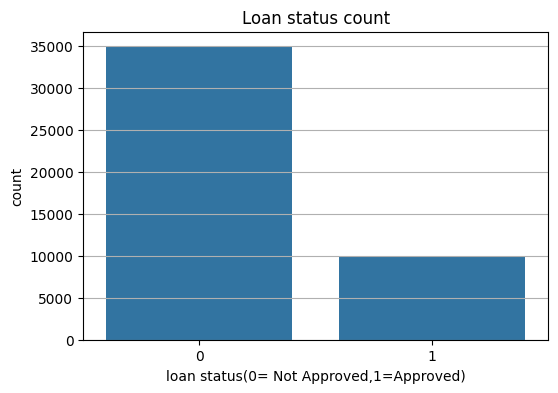

In [27]:
# TODO: Classification EDA
plt.figure(figsize=(6,4))
sns.countplot(x="loan_status",data=loan_df)
plt.title("Loan status count")
plt.xlabel("loan status(0= Not Approved,1=Approved)")
plt.ylabel("count")
plt.show()

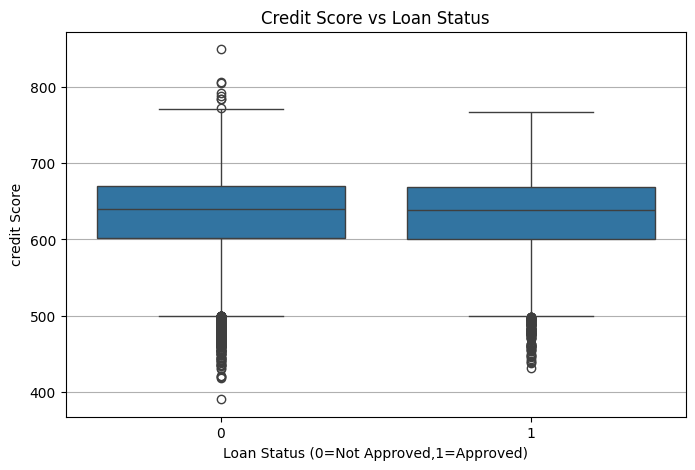

In [28]:
plt.figure(figsize=(8,5))
sns.boxplot(x="loan_status",y="credit_score",data=loan_df)
plt.title("Credit Score vs Loan Status")
plt.xlabel("Loan Status (0=Not Approved,1=Approved)")
plt.ylabel("credit Score")
plt.show()

## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [29]:
# TODO: Prepare classification features
loan_encoded =pd.get_dummies(loan_df,drop_first=True)

In [35]:
X=loan_encoded.drop("loan_status",axis=1)
Y=loan_encoded["loan_status"]

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(
    X,Y,test_size=0.2,random_state=42,stratify=Y
)
print(X_train.shape)
print(X_test.shape)

(36000, 22)
(9000, 22)


In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [40]:
# TODO: Logistic Regression
log_reg = LogisticRegression(
    penalty="l2",
    random_state=42
)

log_reg.fit(X_train,Y_train)
Y_pred_log =log_reg.predict(X_test)

In [42]:
accuracy = accuracy_score(Y_test,Y_pred_log)
precision = precision_score(Y_test,Y_pred_log)

recall = recall_score(Y_test,Y_pred_log)

print("Accuracy:",accuracy)
print("Precisio:",precision)
print("Recall:",recall)

Accuracy: 0.8997777777777778
Precisio: 0.7895569620253164
Recall: 0.7485


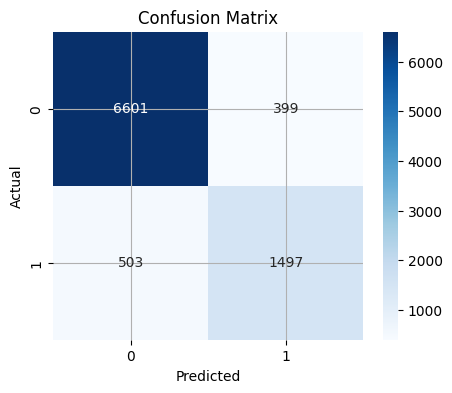

In [43]:
C_mat = confusion_matrix(Y_test,Y_pred_log)

plt.figure(figsize=(5,4))
sns.heatmap(C_mat, annot =True,fmt="d",cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [45]:
# TODO: SVM Classification
svm_model = SVC(
    kernel ="rbf",
    random_state =42
)
svm_model.fit(X_train,Y_train)
Y_pred_svm = svm_model.predict(X_test)

In [46]:
accuracy_svm = accuracy_score(Y_test,Y_pred_svm)
precision_svm = precision_score(Y_test,Y_pred_svm)

recall_svm = recall_score(Y_test,Y_pred_svm)

print("Accuracy:",accuracy_svm)
print("Precisio:",precision_svm)
print("Recall:",recall_svm)

Accuracy: 0.916
Precisio: 0.849438202247191
Recall: 0.756


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [47]:
# TODO: Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)
Y_pred_nb = nb_model.predict(X_test)


In [48]:
accuracy_nb = accuracy_score(Y_test,Y_pred_nb)
precision_nb = precision_score(Y_test,Y_pred_nb)

recall_nb = recall_score(Y_test,Y_pred_nb)

print("Accuracy:",accuracy_nb)
print("Precisio:",precision_nb)
print("Recall:",recall_nb)

Accuracy: 0.753
Precisio: 0.47310012062726176
Recall: 0.9805


## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


In [49]:
# TODO: KNN
k_values = range(1,21)
accuracy_list=[]

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  Y_pred_knn = knn.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_pred_knn)
  accuracy_list.append(accuracy)

print("Accuracies",accuracy_list)

Accuracies [0.8756666666666667, 0.8793333333333333, 0.8888888888888888, 0.8886666666666667, 0.894, 0.8945555555555555, 0.8972222222222223, 0.8933333333333333, 0.8968888888888888, 0.8957777777777778, 0.8983333333333333, 0.8958888888888888, 0.8994444444444445, 0.8965555555555556, 0.8978888888888888, 0.8961111111111111, 0.8986666666666666, 0.8973333333333333, 0.8978888888888888, 0.8983333333333333]


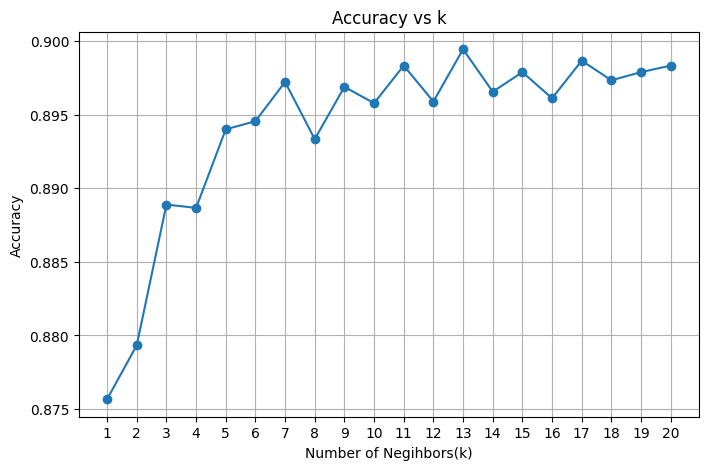

In [51]:
plt.figure(figsize=(8,5))
plt.plot(k_values,accuracy_list,marker='o')
plt.title("Accuracy vs k")
plt.xlabel("Number of Negihbors(k)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [52]:
best_k = k_values[accuracy_list.index(max(accuracy_list))]
print("Best k:",best_k)

Best k: 13


## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [53]:
# TODO: Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state =42
)
rf_model.fit(X_train,Y_train)
Y_pred_rf_model = rf_model.predict(X_test)

In [54]:
importances = rf_model.feature_importances_
feature_importance_df =pd.DataFrame({
    "Feature":X.columns,
    "Importance": importances
})

feature_importance_df = feature_importance_df.sort_values(
    by ="Importance",
    ascending = False
)
print(feature_importance_df.head(10))

                               Feature  Importance
21  previous_loan_defaults_on_file_Yes    0.218127
5                  loan_percent_income    0.163793
4                        loan_int_rate    0.157401
1                        person_income    0.124549
3                            loan_amnt    0.061482
15          person_home_ownership_RENT    0.056364
7                         credit_score    0.054492
0                           person_age    0.031961
2                       person_emp_exp    0.028429
6           cb_person_cred_hist_length    0.026421


The most important feature is previous_loan_default_on_file_yes,showing that past loan defaults strongly affect loan approval.financial factors like loan percent income,interest rate and income are also important

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here

Best Regression Model is random forest regressor it performed best because it handle non-linear relationships and gave better accuracy

random forest classifier performed best due to higher accuracy and better handling of important features.

in real world this classification model can be used in banks to automatically predict loan decisions